# **Import libraries and Necessities**

In [ ]:
from google.colab import files
files.upload() # kaggle.json for API config

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devanlucian","key":"77ccc50457692888b94c7911dd7fc30c"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd #Print Working Directory
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip fake-and-real-news-dataset

/content
 76% 31.0M/41.0M [00:00<00:00, 162MB/s] 
100% 41.0M/41.0M [00:00<00:00, 144MB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
!pip install keras_nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: te

In [ ]:
# Import Nessecities
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import seaborn as sb
import tensorflow as tf
import keras_nlp
import re
import keras

Using TensorFlow backend


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import wordcloud

# Import and Read Real and Fake News Dataset

In [ ]:
RealNews_Dataset = pd.read_csv('/content/True.csv')
RealNews_Dataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
FakeNews_Dataset = pd.read_csv('/content/Fake.csv')
FakeNews_Dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
RealNews_Dataset['Label'] = 0
# RealNews_Dataset.dropna(inplace=False)
RealNews_Dataset.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
FakeNews_Dataset['Label'] = 1
# FakeNews_Dataset.dropna(inplace=False)
FakeNews_Dataset.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


**Combine Both Datasets**

In [ ]:
Dataset = pd.concat([RealNews_Dataset, FakeNews_Dataset], axis = 0, ignore_index=True)
Dataset['title'] = Dataset['title'].astype(str)
Dataset['text']  = Dataset['text'].astype(str)
Dataset['Subject_Category']  = Dataset['subject'].astype('category').cat.codes

Dataset

,title,text,subject,date,Label,Subject_Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,6
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,6
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,6
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,6
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,6
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,1


# **Feature Engineering**

**Get Lenght of Title and Text**

In [ ]:
Dataset['Title_Lenght'] = Dataset['title'].apply(len)
Dataset['Text_Lenght'] = Dataset['text'].apply(len)

**Split Date into Day, Month, Year and remove outliers**

In [ ]:
Dataset['Day'] = 0
Dataset['Month'] = 0
Dataset['Year'] = 0


for Index, Date in enumerate(Dataset['date']):
  if len(Date.split()) == 3:
    Str1, Str2, Str3 =  Date.split()
    Dataset['Day'][Index] = Str2
    Dataset['Month'][Index] = Str1
    Dataset['Year'][Index] = Str3
  else:
    Dataset.drop([Index])

<ipython-input-13-fbfc72ce45f8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Day'][Index] = Str2
<ipython-input-13-fbfc72ce45f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Month'][Index] = Str1
<ipython-input-13-fbfc72ce45f8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Year'][Index] = Str3


In [ ]:
Dataset['Day'] = Dataset['Day'].str.replace(',', '')
Dataset.dropna(inplace=True)
Dataset['Day'] = Dataset['Day'].astype(str).astype(int)

In [ ]:
Dataset['Month'] = Dataset['Month'].apply(lambda x: str(x)[:3].upper())
Dataset['Month']  = Dataset['Month'].astype('category').cat.codes

In [ ]:
Dataset['Year']  = Dataset['Year'].astype('category').cat.codes

**Drop Date and Subject Column**

In [ ]:
Dataset = Dataset.drop(['date'], axis=1)

# **Data Visualization**

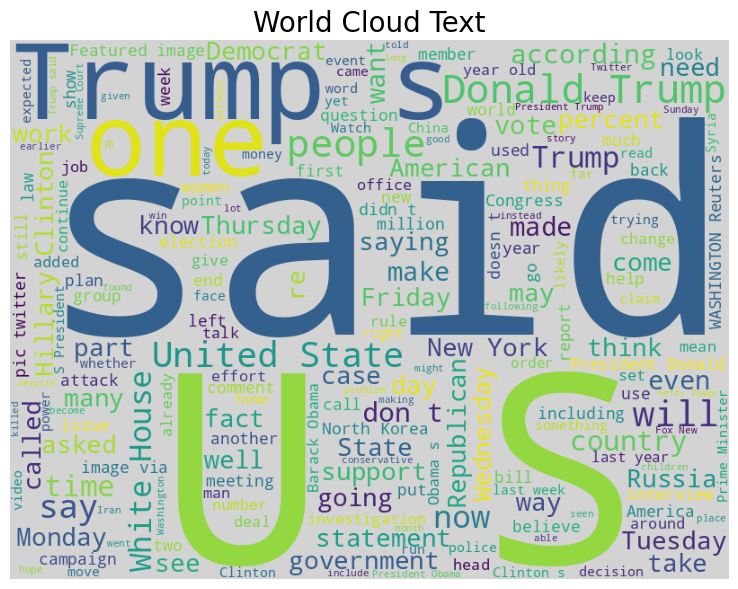

In [ ]:
import wordcloud as WC

text = ' '.join(Dataset['text'].tolist())
stopwords = set(WC.STOPWORDS)
WordCloud = WC.WordCloud(stopwords=stopwords,background_color='lightgrey', colormap='viridis', width=800, height=600).generate(text)

plt.figure(figsize=(10,7), frameon=True)
plt.imshow(WordCloud)
plt.axis('off')
plt.title('World Cloud Text', fontsize=20 )
plt.show()

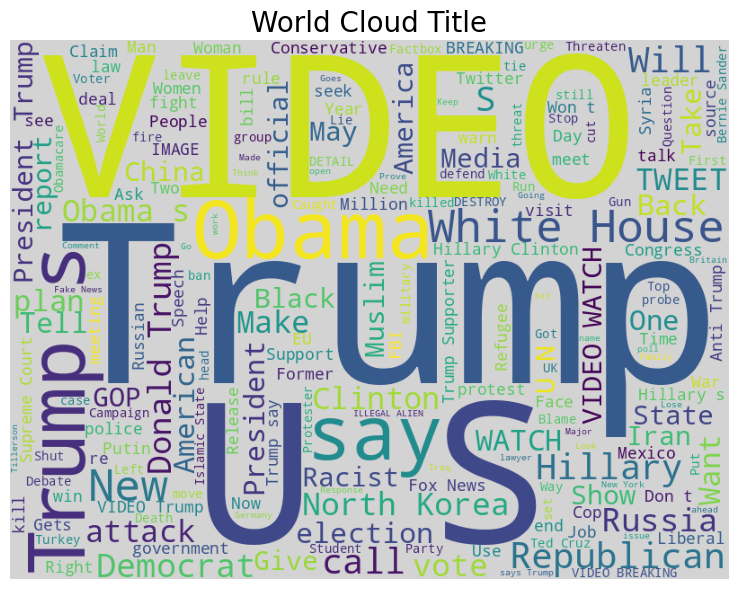

In [ ]:
title = ' '.join(Dataset['title'].tolist())
stopwords = set(WC.STOPWORDS)
WordCloud = WC.WordCloud(stopwords=stopwords,background_color='lightgrey', colormap='viridis', width=800, height=600).generate(title)

plt.figure(figsize=(10,7), frameon=True)
plt.imshow(WordCloud)
plt.axis('off')
plt.title('World Cloud Title', fontsize=20 )
plt.show()

<ipython-input-20-2c4951d08d8a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = Dataset.corr()


Correlation matrix is : 


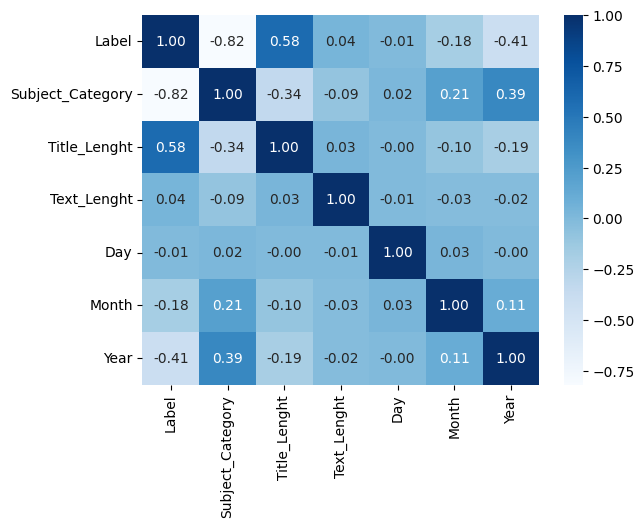

In [ ]:
matrix = Dataset.corr()
print("Correlation matrix is : ")
sb.heatmap(matrix,  annot = True, fmt='.2f', cmap = "Blues")
plt.show()

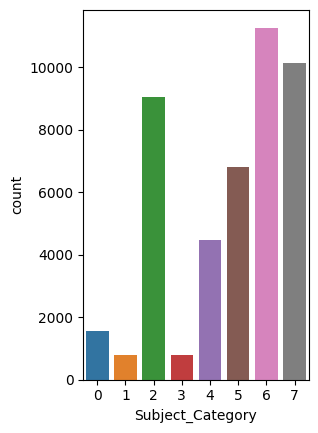

In [ ]:
plt.subplot(1,2,1)
sb.countplot(x='Subject_Category', data=Dataset,)
plt.show()

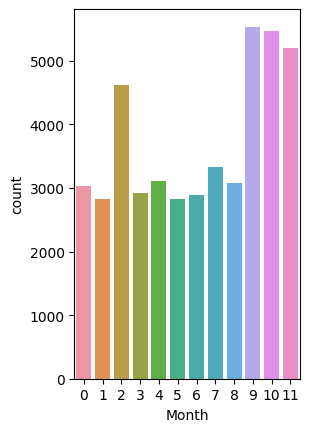

In [ ]:
plt.subplot(1,2,1)
sb.countplot(x='Month', data=Dataset,)
plt.show()

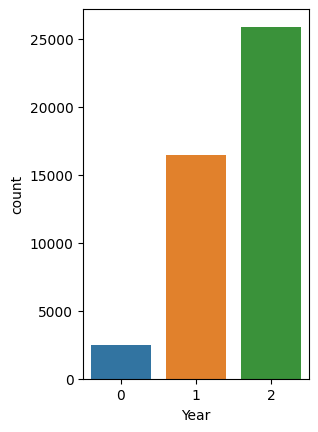

In [ ]:
plt.subplot(1,2,1)
sb.countplot(x='Year', data=Dataset,)
plt.show()

# **Natural Language Preprocessing**

**Tokenization**

In [ ]:
!pip install --user -U nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

def Tokenization(Text):
  tokens = word_tokenize(Text)
  return tokens

In [ ]:
Dataset['title'] = Dataset['title'].apply(Tokenization)

In [ ]:
Dataset['text'] = Dataset['text'].apply(Tokenization)

In [ ]:
Dataset

,title,text,subject,Label,Subject_Category,Title_Lenght,Text_Lenght,Day,Month,Year
0,"[As, U.S., budget, fight, looms, ,, Republican...","[WASHINGTON, (, Reuters, ), -, The, head, of, ...",politicsNews,0,6,64,4659,31,2,2
1,"[U.S., military, to, accept, transgender, recr...","[WASHINGTON, (, Reuters, ), -, Transgender, pe...",politicsNews,0,6,64,4077,29,2,2
2,"[Senior, U.S., Republican, senator, :, 'Let, M...","[WASHINGTON, (, Reuters, ), -, The, special, c...",politicsNews,0,6,60,2789,31,2,2
3,"[FBI, Russia, probe, helped, by, Australian, d...","[WASHINGTON, (, Reuters, ), -, Trump, campaign...",politicsNews,0,6,59,2461,30,2,2
4,"[Trump, wants, Postal, Service, to, charge, 'm...","[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...",politicsNews,0,6,69,5204,29,2,2
...,...,...,...,...,...,...,...,...,...,...
44893,"[McPain, :, John, McCain, Furious, That, Iran,...","[21st, Century, Wire, says, As, 21WIRE, report...",Middle-east,1,1,61,3237,16,4,1
44894,"[JUSTICE, ?, Yahoo, Settles, E-mail, Privacy, ...","[21st, Century, Wire, says, It, s, a, familiar...",Middle-east,1,1,81,1684,16,4,1
44895,"[Sunnistan, :, US, and, Allied, ‘, Safe, Zone,...","[Patrick, Henningsen, 21st, Century, WireRemem...",Middle-east,1,1,85,25065,15,4,1
44896,"[How, to, Blow, $, 700, Million, :, Al, Jazeer...","[21st, Century, Wire, says, Al, Jazeera, Ameri...",Middle-east,1,1,67,2685,14,4,1


**Stopword and Punctiation Removal**

In [ ]:
from string import punctuation

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Stop_words = set(stopwords.words('english'))

def StopWordAndPunctiationRemoval(Text):
    Filtered_Sentences = [word.lower() for word in Text if word not in Stop_words]
    Filtered_Sentences = [word.lower() for word in Filtered_Sentences if word not in punctuation]
    return Filtered_Sentences

In [ ]:
Dataset['title'] = Dataset['title'].apply(StopWordAndPunctiationRemoval)
Dataset['text'] = Dataset['text'].apply(StopWordAndPunctiationRemoval)

In [ ]:
Dataset

,title,text,subject,Label,Subject_Category,Title_Lenght,Text_Lenght,Day,Month,Year
0,"[as, u.s., budget, fight, looms, republicans, ...","[washington, reuters, the, head, conservative,...",politicsNews,0,6,64,4659,31,2,2
1,"[u.s., military, accept, transgender, recruits...","[washington, reuters, transgender, people, all...",politicsNews,0,6,64,4077,29,2,2
2,"[senior, u.s., republican, senator, 'let, mr.,...","[washington, reuters, the, special, counsel, i...",politicsNews,0,6,60,2789,31,2,2
3,"[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser...",politicsNews,0,6,59,2461,30,2,2
4,"[trump, wants, postal, service, charge, 'much,...","[seattle/washington, reuters, president, donal...",politicsNews,0,6,69,5204,29,2,2
...,...,...,...,...,...,...,...,...,...,...
44893,"[mcpain, john, mccain, furious, that, iran, tr...","[21st, century, wire, says, as, 21wire, report...",Middle-east,1,1,61,3237,16,4,1
44894,"[justice, yahoo, settles, e-mail, privacy, cla...","[21st, century, wire, says, it, familiar, them...",Middle-east,1,1,81,1684,16,4,1
44895,"[sunnistan, us, allied, ‘, safe, zone, ’, plan...","[patrick, henningsen, 21st, century, wireremem...",Middle-east,1,1,85,25065,15,4,1
44896,"[how, blow, 700, million, al, jazeera, america...","[21st, century, wire, says, al, jazeera, ameri...",Middle-east,1,1,67,2685,14,4,1


# **Train, Test, and Split for Machine Learning**

**Word Vectorizer**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer_Title = CountVectorizer().fit([' '.join(words) for words in Dataset['title']])
Vectorizer_Text = CountVectorizer().fit([' '.join(words) for words in Dataset['text']])

In [ ]:
Vectorized_Title = Vectorizer_Title.transform([' '.join(words) for words in Dataset['title']])
Vectorized_Text = Vectorizer_Text.transform([' '.join(words) for words in Dataset['text']])

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
TF_IDF_Title = TfidfTransformer().fit(Vectorized_Title)
TF_IDF_Text = TfidfTransformer().fit(Vectorized_Text)

In [ ]:
TF_Data_Title = TF_IDF_Title.transform(Vectorized_Title)
TF_Data_Text = TF_IDF_Text.transform(Vectorized_Text)

**Combining Text and Title**

In [ ]:
import scipy
from scipy.sparse import hstack

In [ ]:
labels_ML = numpy.array(Dataset['Label'])

In [ ]:
Combined_Features = hstack([TF_Data_Title,TF_Data_Text])

**Dataset Creation for Machine Learning**

In [ ]:
X_trainML, X_testML, Y_trainML, y_testML = train_test_split(Combined_Features.tocsr(), labels_ML, test_size=0.2, random_state=24)

In [ ]:
X_trainML

<35882x142728 sparse matrix of type '<class 'numpy.float64'>'
	with 6587569 stored elements in Compressed Sparse Row format>

# **Machine Learning Using Different Algorithms**

**Confusion Matrix and General Metrics**

In [ ]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(y_true, y_pred):
    Confusion_Matrix = confusion_matrix(y_true, y_pred)
    print('True Positive = ', Confusion_Matrix[0][0])
    print('False Positive = ', Confusion_Matrix[0][1])
    print('False Negative = ', Confusion_Matrix[1][0])
    print('True Negative = ', Confusion_Matrix[1][1])
    print('\n')
    df_cm = pd.DataFrame(Confusion_Matrix, range(2), range(2))
    sb.set(font_scale=1.4) # for label size
    sb.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(numpy.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(numpy.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (Confusion_Matrix[0][0]+Confusion_Matrix[1][1])/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1]+Confusion_Matrix[1][0]+ Confusion_Matrix[1][1])
    print("Accuracy = ",calculated_acc*100)

In [ ]:
import time

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
Start_timeNB = time.time()
naive_bayes_classifier = MultinomialNB(alpha=0.1).fit(X_trainML, Y_trainML)
End_timeNB = time.time()

In [ ]:
nb_train_prediction = naive_bayes_classifier.predict(X_trainML)
nb_test_prediction = naive_bayes_classifier.predict(X_testML)

In [ ]:
nb_train_accuracy = accuracy_score(Y_trainML, nb_train_prediction)
nb_test_accuracy = accuracy_score(y_testML, nb_test_prediction)

In [ ]:
print("Training Accuracy: ", nb_train_accuracy*100)
print("Testing Accuracy:  ", nb_test_accuracy*100)

Training Accuracy:  98.06588261523885
Testing Accuracy:   97.0571842603946


True Positive =  4150
False Positive =  179
False Negative =  85
True Negative =  4557




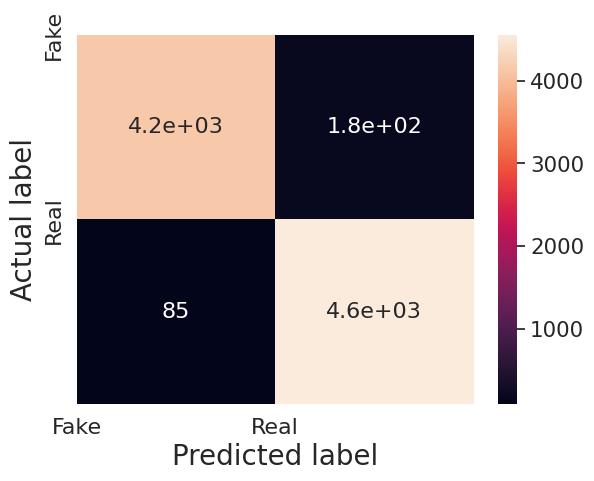

Accuracy =  97.0571842603946


In [ ]:
print_confusion_matrix(y_testML, nb_test_prediction)

In [ ]:
print("Classification Report:\n", classification_report(y_testML, nb_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4329
           1       0.96      0.98      0.97      4642

    accuracy                           0.97      8971
   macro avg       0.97      0.97      0.97      8971
weighted avg       0.97      0.97      0.97      8971



In [ ]:
print(f"Training time: {(Start_timeNB - End_timeNB)*-1} seconds")

Training time: 0.12293744087219238 seconds


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Start_timeLR = time.time()
logistic_regression_classifier= LogisticRegression(C=1,penalty="l2", max_iter=1000).fit(X_trainML, Y_trainML)
End_timeLR = time.time()

In [ ]:
lg_train_prediction = logistic_regression_classifier.predict(X_trainML)
lg_test_prediction = logistic_regression_classifier.predict(X_testML)

In [ ]:
lg_train_accuracy = accuracy_score(Y_trainML, lg_train_prediction)
lg_test_accuracy = accuracy_score(y_testML, lg_test_prediction)

In [ ]:
print("Training Accuracy: ", lg_train_accuracy*100)
print("Testing Accuracy:  ", lg_test_accuracy*100)

Training Accuracy:  99.93868792152054
Testing Accuracy:   99.64329506186601


True Positive =  4317
False Positive =  12
False Negative =  20
True Negative =  4622




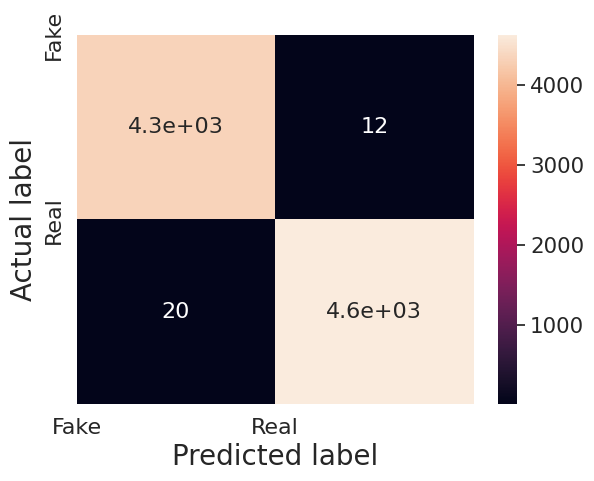

Accuracy =  99.64329506186601


In [ ]:
print_confusion_matrix(y_testML, lg_test_prediction)

In [ ]:
print("Classification Report:\n", classification_report(y_testML, lg_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4329
           1       1.00      1.00      1.00      4642

    accuracy                           1.00      8971
   macro avg       1.00      1.00      1.00      8971
weighted avg       1.00      1.00      1.00      8971



In [ ]:
print(f"Training time: {(Start_timeLR - End_timeLR)*-1} seconds")

Training time: 4.936779499053955 seconds


Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
Start_timeSVM = time.time()
support_vector_machines_classifier= SVC(C=1, kernel='linear', gamma='scale').fit(X_trainML, Y_trainML)
End_timeSVM = time.time()

In [ ]:
support_vector_machines_train_prediction = support_vector_machines_classifier.predict(X_trainML)
support_vector_machines_test_prediction = support_vector_machines_classifier.predict(X_testML)

In [ ]:
support_vector_machines_train_accuracy = accuracy_score(Y_trainML, support_vector_machines_train_prediction)
support_vector_machines_test_accuracy = accuracy_score(y_testML, support_vector_machines_test_prediction)

In [ ]:
print(support_vector_machines_train_accuracy*100)
print(support_vector_machines_test_accuracy*100)

99.99721308734183
99.87738267751645


True Positive =  4324
False Positive =  5
False Negative =  6
True Negative =  4636




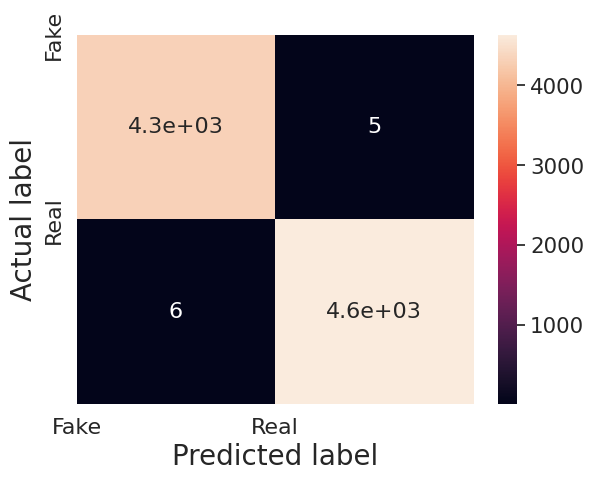

Accuracy =  99.87738267751645


In [ ]:
print_confusion_matrix(y_testML, support_vector_machines_test_prediction)

In [ ]:
print("Classification Report:\n", classification_report(y_testML, lg_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4329
           1       1.00      1.00      1.00      4642

    accuracy                           1.00      8971
   macro avg       1.00      1.00      1.00      8971
weighted avg       1.00      1.00      1.00      8971



In [ ]:
print(f"Training time: {(Start_timeSVM - End_timeSVM)*-1} seconds")

Training time: 878.073531627655 seconds


# **Deep Learning Using Pretrained BERT Model**

In [ ]:
Dataset['title'] = [' '.join(words) for words in Dataset['title']]

In [ ]:
Dataset['text'] = [' '.join(words) for words in Dataset['text']]

In [ ]:
Features = numpy.array(Dataset[['title', 'text', 'Subject_Category', 'Month', 'Year', 'Title_Lenght']])
Labels = numpy.array(Dataset['Label'])

In [ ]:
X_train, X_test, Y_train, y_test = train_test_split(Features, Labels, test_size=0.2, random_state=24)

**BERT Model Creation**

In [ ]:
Title_input   = tf.keras.layers.Input(shape=(),dtype=tf.string,name='Title')

preprocess = keras_nlp.models.BertPreprocessor.from_preset("bert_tiny_en_uncased")(Title_input)
backbone1 = keras_nlp.models.BertBackbone.from_preset("bert_tiny_en_uncased")(preprocess)['pooled_output']

Text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name='Text')

preprocess = keras_nlp.models.BertPreprocessor.from_preset("bert_tiny_en_uncased")(Text_input)
backbone2 = keras_nlp.models.BertBackbone.from_preset("bert_tiny_en_uncased")(preprocess)['pooled_output']

Subject_input = tf.keras.layers.Input(shape=(1,),dtype=tf.float32, name='Subject_Category')
Feature1 = tf.keras.layers.CategoryEncoding(num_tokens=10, output_mode="one_hot")(Subject_input)

Month_input = tf.keras.layers.Input(shape=(1,),dtype=tf.float32, name='Month')
Feature2 = tf.keras.layers.CategoryEncoding(num_tokens=12, output_mode="one_hot")(Month_input)

Year_input = tf.keras.layers.Input(shape=(1,),dtype=tf.float32, name='Year')
Feature3 = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="one_hot")(Year_input)

Title_length_input = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='Title_Length')

d1 = tf.keras.layers.Dense(512, activation='relu')(tf.keras.layers.concatenate([backbone1,
                                                                                backbone2,
                                                                                Feature1,
                                                                                Feature2,
                                                                                Feature3,
                                                                                Title_length_input]))

output = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(d1)

model = tf.keras.Model(inputs=[Title_input, Text_input,Subject_input, Month_input, Year_input, Title_length_input], outputs=[output])

17602216/17602216 [==============================] - 1s 0us/step


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=tf.keras.metrics.BinaryAccuracy())

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Title (InputLayer)          [(None,)]                    0         []                            
                                                                                                  
 Text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 bert_preprocessor (BertPre  {'token_ids': (None, 512),   0         ['Title[0][0]']               
 processor)                   'segment_ids': (None, 512                                           
                             ),                                                                   
                              'padding_mask': (None, 51                                       

**Training**

In [ ]:
Model = model.fit(x= {'Title': X_train[:, 0],
                      'Text': X_train[:, 1],
                      'Subject_Category': X_train[:, 2].astype('float32'),
                      'Month': X_train[:, 3].astype('float32'),
                      'Year': X_train[:, 4].astype('float32'),
                      'Title_Length': X_train[:, 5].astype('float32')
                      },
                  y=Y_train,
                  epochs=1,
                  verbose=1,
                  batch_size=30)

1197/1197 [==============================] - 5367s 4s/step - loss: 0.0196 - binary_accuracy: 0.9931


**Testing**

In [ ]:
results = model.evaluate({'Title': X_test[:, 0],
                      'Text': X_test[:, 1],
                      'Subject_Category': X_test[:, 2].astype('float32'),
                      'Month': X_test[:, 3].astype('float32'),
                      'Year': X_test[:, 4].astype('float32'),
                      'Title_Length': X_test[:, 5].astype('float32')}, y_test, batch_size=30)

300/300 [==============================] - 442s 1s/step - loss: 0.0022 - binary_accuracy: 0.9997


In [ ]:
print("test loss, test acc:", results)

test loss, test acc: [0.002193518215790391, 0.9996656179428101]


In [ ]:
Prediction = model.predict({'Title': X_test[:, 0],
                      'Text': X_test[:, 1],
                      'Subject_Category': X_test[:, 2].astype('float32'),
                      'Month': X_test[:, 3].astype('float32'),
                      'Year': X_test[:, 4].astype('float32'),
                      'Title_Length': X_test[:, 5].astype('float32')})

281/281 [==============================] - 486s 2s/step


In [ ]:
Prediction

array([[1.0000000e+00],
       [6.4069231e-05],
       [4.2306015e-06],
       ...,
       [2.8839071e-05],
       [1.6362876e-04],
       [1.0000000e+00]], dtype=float32)

In [ ]:
BinaryLabels_Prediction = (Prediction >= 0.5).astype(int).flatten()

True Positive =  4327
False Positive =  2
False Negative =  1
True Negative =  4641




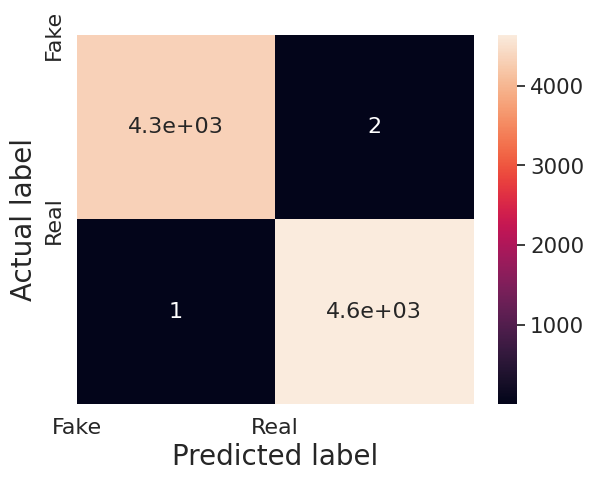

Accuracy =  99.96655891204995


In [ ]:
print_confusion_matrix(y_test, BinaryLabels_Prediction)

**Saving the Model**

In [ ]:
import torch
torch.save(model, 'BERT_Stuff.pt')

/usr/local/lib/python3.10/dist-packages/keras/src/activations.py:549: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:                 activation=lambda x: keras.activations.gelu(
                    x, approximate=True
                ),

  fn_config = serialization_lib.serialize_keras_object(activation)
